In [1]:
!pip install koreanize-matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 29.4 MB/s eta 0:00:00


In [2]:
# prompt: ["광고_시작일"],["광고_종료일"]컬럼을 date 타입으로 변환

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

# 모든 컬럼을 표시하도록 설정
pd.set_option('display.max_columns', None)

# CSV 파일을 Pandas DataFrame으로 불러오기
try:
  ad_data = pd.read_csv('ad_data.csv')
  display(ad_data)
except FileNotFoundError:
  print("Error: 'ad_data.csv' file not found. Please make sure the file exists in the current directory.")
except pd.errors.EmptyDataError:
  print("Error: 'ad_data.csv' file is empty.")
except pd.errors.ParserError:
  print("Error: Unable to parse 'ad_data.csv'. Please check the file format.")
except Exception as e:
  print(f"An unexpected error occurred: {e}")

# Convert columns to datetime objects
try:
    ad_data["광고_시작일"] = pd.to_datetime(ad_data["광고_시작일"])
    ad_data["광고_종료일"] = pd.to_datetime(ad_data["광고_종료일"])
except (KeyError, TypeError):
    print("Error: '광고_시작일' or '광고_종료일' column not found or cannot be converted to datetime.")
except ValueError as e:
    print(f"Error converting to datetime: {e}")
    print("Please check the format of the date columns.")
except Exception as e:
    print(f"An unexpected error occurred during date conversion: {e}")


display(ad_data.info())
display(ad_data.head())


,광고_채널,광고_형식,광고_노출_횟수,광고_클릭_횟수,광고_지출액,광고_타겟팅,광고_시작일,광고_종료일,사용자_ID,성별,연령,거주_지역,직업,관심사,구매_이력,웹사이트_방문_수,페이지뷰,전환율,매출액,광고_회상률,광고_태도_변화
0,SNS,텍스트,9849,294,757.26,"20대, 남성, 패션",2024-08-15,2024-09-01,b0551863-4726-4d83-abf4-0aeba5663b3c,남성,18,안양,직장인,요리,3,301,1204,0.007,126.99,0.212,-0.128
1,온라인,텍스트,9904,505,378.65,"50대, 여성, 게임",2024-12-11,2024-12-30,7ef04a52-9152-489c-8073-5c86cc397e39,남성,39,대전,프리랜서,패션,3,509,1527,0.022,2030.33,0.187,-0.234
2,온라인,배너,10048,545,564.96,"40대, 여성, 패션",2024-07-31,2024-08-27,0dca36e9-1a44-4455-8930-da5d7ab7f870,여성,21,천안,프리랜서,기술,4,547,547,0.020,963.91,0.249,-0.040
3,SNS,배너,9988,326,570.79,"40대, 남성, 건강",2024-11-05,2024-11-21,ff995b59-0554-4db2-9f7f-b1e4a50002d4,여성,41,춘천,공무원,여행,5,331,1324,0.027,1727.08,0.153,-0.180
4,SNS,이미지,10113,277,772.68,"50대, 남성, 게임",2024-03-03,2024-03-17,6de271b7-ddc0-4c82-9951-693753f99210,여성,31,진주,직장인,패션,1,287,1148,0.017,663.02,0.154,0.197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,TV,배너,10054,107,985.99,"50대, 남성, 게임",2024-07-30,2024-08-29,60512d0a-426a-4c25-869f-bd2e60c855f9,남성,58,전주,학생,패션,2,111,555,0.000,0.00,0.272,0.265
99996,TV,배너,9898,99,965.39,"40대, 여성, 패션",2024-06-01,2024-06-22,6cf1119d-41b5-4355-8e44-ec98dd9eb732,남성,40,천안,학생,스포츠,3,103,309,0.049,653.44,0.259,-0.007
99997,온라인,이미지,9972,487,516.39,"40대, 여성, 음악",2024-10-21,2024-11-17,81872081-a519-40fc-8c20-5eec49280b08,여성,65,청주,공무원,여행,2,487,487,0.014,860.08,0.244,-0.055
99998,SNS,배너,9929,286,655.47,"30대, 남성, 여행",2024-08-19,2024-08-26,6a9d4c28-6b94-478d-99c8-2bb4eb7024b7,남성,46,포항,직장인,패션,1,290,580,0.014,332.82,0.191,-0.013


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   광고_채널      100000 non-null  object        
 1   광고_형식      100000 non-null  object        
 2   광고_노출_횟수   100000 non-null  int64         
 3   광고_클릭_횟수   100000 non-null  int64         
 4   광고_지출액     100000 non-null  float64       
 5   광고_타겟팅     100000 non-null  object        
 6   광고_시작일     100000 non-null  datetime64[ns]
 7   광고_종료일     100000 non-null  datetime64[ns]
 8   사용자_ID     100000 non-null  object        
 9   성별         100000 non-null  object        
 10  연령         100000 non-null  int64         
 11  거주_지역      100000 non-null  object        
 12  직업         100000 non-null  object        
 13  관심사        100000 non-null  object        
 14  구매_이력      100000 non-null  int64         
 15  웹사이트_방문_수  100000 non-null  int64         
 16  페이지뷰       100000 non

None

,광고_채널,광고_형식,광고_노출_횟수,광고_클릭_횟수,광고_지출액,광고_타겟팅,광고_시작일,광고_종료일,사용자_ID,성별,연령,거주_지역,직업,관심사,구매_이력,웹사이트_방문_수,페이지뷰,전환율,매출액,광고_회상률,광고_태도_변화
0,SNS,텍스트,9849,294,757.26,"20대, 남성, 패션",2024-08-15,2024-09-01,b0551863-4726-4d83-abf4-0aeba5663b3c,남성,18,안양,직장인,요리,3,301,1204,0.007,126.99,0.212,-0.128
1,온라인,텍스트,9904,505,378.65,"50대, 여성, 게임",2024-12-11,2024-12-30,7ef04a52-9152-489c-8073-5c86cc397e39,남성,39,대전,프리랜서,패션,3,509,1527,0.022,2030.33,0.187,-0.234
2,온라인,배너,10048,545,564.96,"40대, 여성, 패션",2024-07-31,2024-08-27,0dca36e9-1a44-4455-8930-da5d7ab7f870,여성,21,천안,프리랜서,기술,4,547,547,0.020,963.91,0.249,-0.040
3,SNS,배너,9988,326,570.79,"40대, 남성, 건강",2024-11-05,2024-11-21,ff995b59-0554-4db2-9f7f-b1e4a50002d4,여성,41,춘천,공무원,여행,5,331,1324,0.027,1727.08,0.153,-0.180
4,SNS,이미지,10113,277,772.68,"50대, 남성, 게임",2024-03-03,2024-03-17,6de271b7-ddc0-4c82-9951-693753f99210,여성,31,진주,직장인,패션,1,287,1148,0.017,663.02,0.154,0.197


In [3]:
#ARPU
import pandas as pd
import numpy as np

# 데이터 로드 (데이터가 CSV 형식으로 저장되어 있다고 가정)
df = pd.read_csv('ad_data.csv')


# 1. 고유 사용자 수 계산
unique_users_count = df['사용자_ID'].nunique()
print(f'고유 사용자 수: {unique_users_count}명')

# 2. 총 매출액 계산
total_revenue = df['매출액'].sum()
print(f'총 매출액: {total_revenue:.2f}원')

# 3. ARPU 계산 (사용자당 평균 수익)
arpu = total_revenue / unique_users_count
print(f'ARPU (사용자당 평균 수익): {arpu:.2f}원')

# 4. 추가 분석: 사용자별 매출액 통계
user_revenue = df.groupby('사용자_ID')['매출액'].sum()
print('\n사용자별 매출액 통계:')
print(f'최소 매출액: {user_revenue.min():.2f}원')
print(f'최대 매출액: {user_revenue.max():.2f}원')
print(f'중간값 매출액: {user_revenue.median():.2f}원')
print(f'표준편차: {user_revenue.std():.2f}원')

# 5. ARPU 히스토그램을 위한 사용자별 매출액 분포 확인 (선택적)
user_revenue_distribution = user_revenue.describe(percentiles=[0.25, 0.5, 0.75, 0.9, 0.95, 0.99])
print('\n사용자별 매출액 분포:')
print(user_revenue_distribution)

# 실제 프로젝트에서는 다음과 같은 추가 분석이 가능합니다
"""
# 6. 세그먼트별 ARPU 계산 예시 (성별, 연령대, 지역 등으로 그룹화)
segment_arpu = df.groupby('세그먼트')['매출액'].sum() / df.groupby('세그먼트')['사용자_ID'].nunique()
print('\n세그먼트별 ARPU:')
print(segment_arpu)

# 7. 시간에 따른 ARPU 추세 분석 (월별, 분기별)
time_based_arpu = df.groupby('기간')['매출액'].sum() / df.groupby('기간')['사용자_ID'].nunique()
"""

고유 사용자 수: 100000명
총 매출액: 83793653.28원
ARPU (사용자당 평균 수익): 837.94원

사용자별 매출액 통계:
최소 매출액: 0.00원
최대 매출액: 5066.05원
중간값 매출액: 683.88원
표준편차: 654.68원

사용자별 매출액 분포:
count    100000.000000
mean        837.936533
std         654.678985
min           0.000000
25%         330.137500
50%         683.880000
75%        1196.312500
90%        1766.012000
95%        2140.232000
99%        2795.093600
max        5066.050000
Name: 매출액, dtype: float64


"\n# 6. 세그먼트별 ARPU 계산 예시 (성별, 연령대, 지역 등으로 그룹화)\nsegment_arpu = df.groupby('세그먼트')['매출액'].sum() / df.groupby('세그먼트')['사용자_ID'].nunique()\nprint('\n세그먼트별 ARPU:')\nprint(segment_arpu)\n\n# 7. 시간에 따른 ARPU 추세 분석 (월별, 분기별)\ntime_based_arpu = df.groupby('기간')['매출액'].sum() / df.groupby('기간')['사용자_ID'].nunique()\n"

전체 캠페인 성과 요약
총 노출 수: 1,000,013,032
총 클릭 수: 30,015,428
총 광고비: ₩73,350,120.86
총 매출: ₩83,793,653.28
총 순이익: ₩10,443,532.42
전체 ROAS: 1.14
전체 ROI: 14.24%
전체 CTR: 3.00%
전체 CPC: ₩2.44
평균 광고 회상률: 21.58%
평균 광고 태도 변화: -0.000


채널-형식 조합별 ROI 순위
10. 온라인-배너: ROI 178.24%, ROAS 2.78, 순이익: ₩7486071.03
12. 온라인-텍스트: ROI 177.95%, ROAS 2.78, 순이익: ₩7427445.05
9. 온라인-동영상: ROI 175.97%, ROAS 2.76, 순이익: ₩7327135.68
11. 온라인-이미지: ROI 173.66%, ROAS 2.74, 순이익: ₩7169170.96
4. SNS-텍스트: ROI 20.75%, ROAS 1.21, 순이익: ₩1219367.85
1. SNS-동영상: ROI 19.77%, ROAS 1.20, 순이익: ₩1143002.31
3. SNS-이미지: ROI 19.71%, ROAS 1.20, 순이익: ₩1157159.21
2. SNS-배너: ROI 18.95%, ROAS 1.19, 순이익: ₩1119247.21
6. TV-배너: ROI -70.63%, ROAS 0.29, 순이익: ₩-5812051.85
8. TV-텍스트: ROI -70.89%, ROAS 0.29, 순이익: ₩-5926488.95
7. TV-이미지: ROI -71.13%, ROAS 0.29, 순이익: ₩-5819468.24
5. TV-동영상: ROI -71.33%, ROAS 0.29, 순이익: ₩-6047057.84


채널별 성과
채널: SNS
  ROAS: 1.20
  ROI: 19.79%
  CTR: 3.00%
  CPC: ₩2.33
  광고 회상률: 21.57%
  광고 태도 변화: -0.001

채널: TV
  ROAS: 0.29
  ROI: -

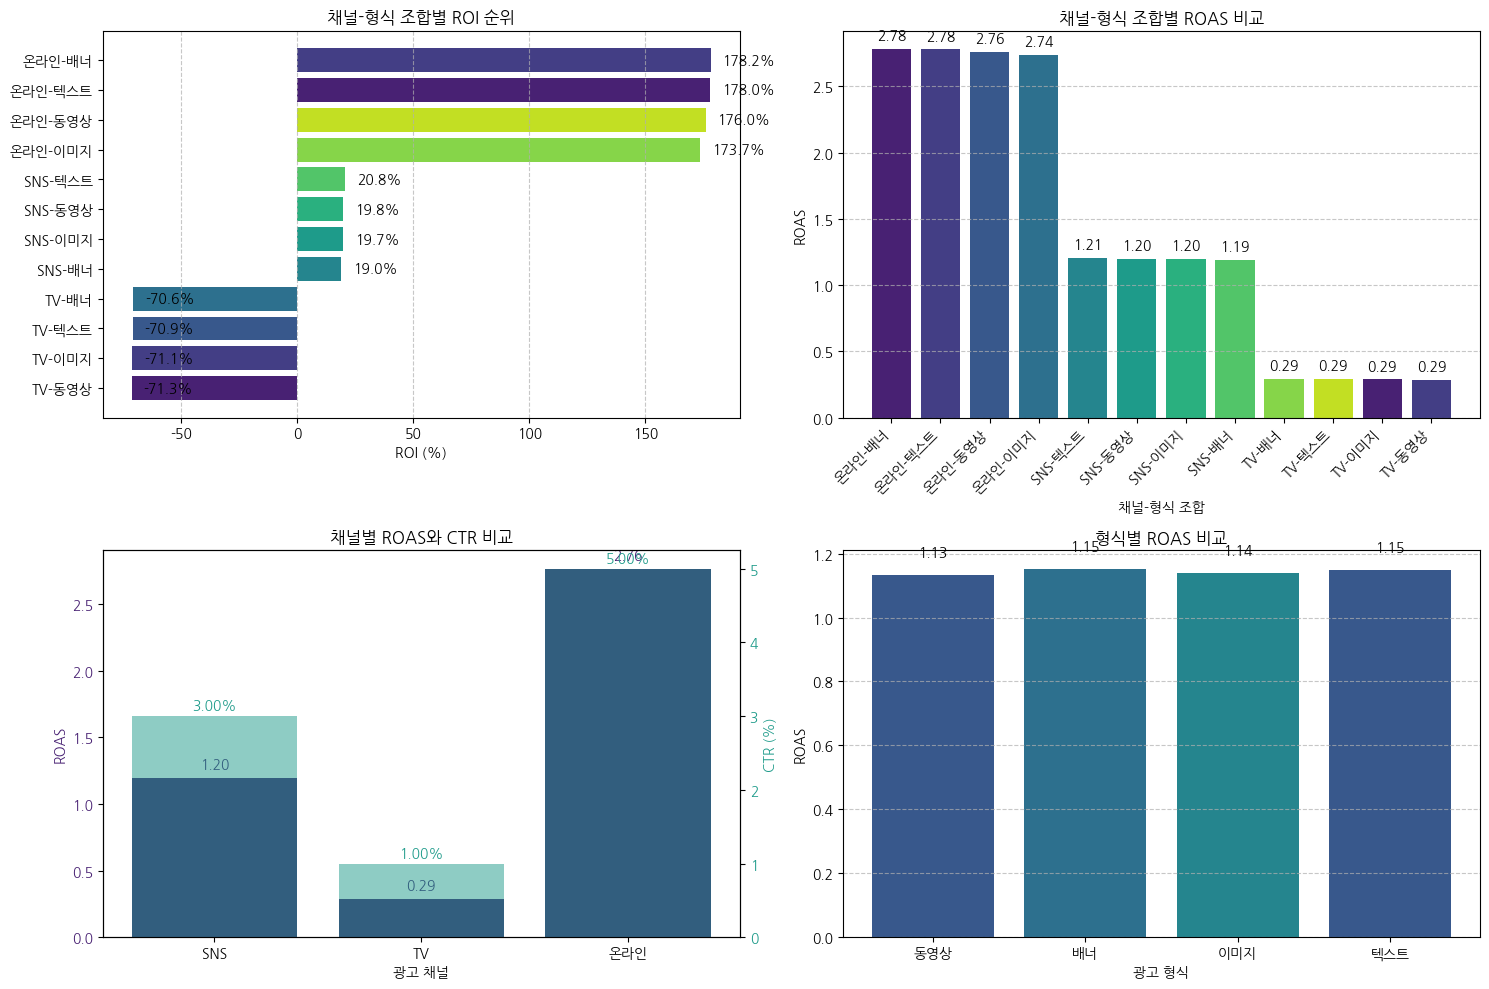

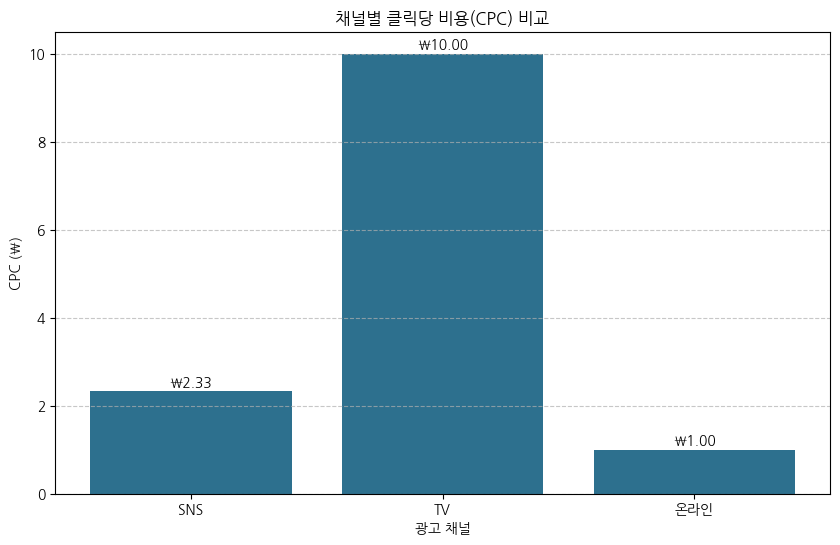

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
import matplotlib as mpl

# 한글 폰트 설정 - 시스템에 맞게 수정 필요
# Windows의 경우
# font_path = "c:/Windows/Fonts/malgun.ttf"
# Mac의 경우
# font_path = "/Library/Fonts/AppleGothic.ttf"
# font = font_manager.FontProperties(fname=font_path).get_name()
# rc('font', family=font)

# 한글 깨짐 방지
mpl.rcParams['axes.unicode_minus'] = False

def load_and_preprocess_data(file_path):
    """데이터를 로드하고 전처리합니다."""
    # 데이터 로드
    df = pd.read_csv('ad_data.csv')

    # 필요한 경우 데이터 타입 변환
    # df['광고_시작일'] = pd.to_datetime(df['광고_시작일'])
    # df['광고_종료일'] = pd.to_datetime(df['광고_종료일'])

    # ROAS 계산 (Return on Ad Spend) = 매출액 / 광고_지출액
    df['ROAS'] = df['매출액'] / df['광고_지출액']

    # ROI 계산 (Return on Investment) = (매출액 - 광고_지출액) / 광고_지출액 * 100
    df['ROI'] = (df['매출액'] - df['광고_지출액']) / df['광고_지출액'] * 100

    # 순이익 계산
    df['순이익'] = df['매출액'] - df['광고_지출액']

    # CTR 계산 (Click-Through Rate) = 광고_클릭_횟수 / 광고_노출_횟수 * 100
    df['CTR'] = df['광고_클릭_횟수'] / df['광고_노출_횟수'] * 100

    # CPC 계산 (Cost Per Click) = 광고_지출액 / 광고_클릭_횟수
    df['CPC'] = df['광고_지출액'] / df['광고_클릭_횟수']

    # 채널-형식 조합 컬럼 생성
    df['채널_형식'] = df['광고_채널'] + '-' + df['광고_형식']

    return df

def analyze_roas_roi(df):
    """ROAS와 ROI 분석을 수행합니다."""
    results = {}

    # 1. 전체 캠페인 성과 계산
    total_spend = df['광고_지출액'].sum()
    total_revenue = df['매출액'].sum()
    total_profit = total_revenue - total_spend
    total_roi = (total_profit / total_spend) * 100
    total_roas = total_revenue / total_spend
    total_impressions = df['광고_노출_횟수'].sum()
    total_clicks = df['광고_클릭_횟수'].sum()
    overall_ctr = (total_clicks / total_impressions) * 100
    overall_cpc = total_spend / total_clicks
    avg_recall = df['광고_회상률'].mean() * 100
    avg_attitude_change = df['광고_태도_변화'].mean()

    results['overall'] = {
        '총_노출수': total_impressions,
        '총_클릭수': total_clicks,
        '총_광고비': total_spend,
        '총_매출': total_revenue,
        '총_순이익': total_profit,
        '전체_ROAS': total_roas,
        '전체_ROI': total_roi,
        '전체_CTR': overall_ctr,
        '전체_CPC': overall_cpc,
        '평균_회상률': avg_recall,
        '평균_태도변화': avg_attitude_change
    }

    # 2. 채널별 분석
    channel_analysis = df.groupby('광고_채널').agg({
        '광고_노출_횟수': 'sum',
        '광고_클릭_횟수': 'sum',
        '광고_지출액': 'sum',
        '매출액': 'sum',
        '광고_회상률': 'mean',
        '광고_태도_변화': 'mean'
    }).reset_index()

    channel_analysis['ROAS'] = channel_analysis['매출액'] / channel_analysis['광고_지출액']
    channel_analysis['ROI'] = (channel_analysis['매출액'] - channel_analysis['광고_지출액']) / channel_analysis['광고_지출액'] * 100
    channel_analysis['CTR'] = channel_analysis['광고_클릭_횟수'] / channel_analysis['광고_노출_횟수'] * 100
    channel_analysis['CPC'] = channel_analysis['광고_지출액'] / channel_analysis['광고_클릭_횟수']
    channel_analysis['순이익'] = channel_analysis['매출액'] - channel_analysis['광고_지출액']
    channel_analysis['광고_회상률'] = channel_analysis['광고_회상률'] * 100

    results['channel'] = channel_analysis

    # 3. 형식별 분석
    format_analysis = df.groupby('광고_형식').agg({
        '광고_노출_횟수': 'sum',
        '광고_클릭_횟수': 'sum',
        '광고_지출액': 'sum',
        '매출액': 'sum',
        '광고_회상률': 'mean',
        '광고_태도_변화': 'mean'
    }).reset_index()

    format_analysis['ROAS'] = format_analysis['매출액'] / format_analysis['광고_지출액']
    format_analysis['ROI'] = (format_analysis['매출액'] - format_analysis['광고_지출액']) / format_analysis['광고_지출액'] * 100
    format_analysis['CTR'] = format_analysis['광고_클릭_횟수'] / format_analysis['광고_노출_횟수'] * 100
    format_analysis['CPC'] = format_analysis['광고_지출액'] / format_analysis['광고_클릭_횟수']
    format_analysis['순이익'] = format_analysis['매출액'] - format_analysis['광고_지출액']
    format_analysis['광고_회상률'] = format_analysis['광고_회상률'] * 100

    results['format'] = format_analysis

    # 4. 채널-형식 조합 분석
    combo_analysis = df.groupby('채널_형식').agg({
        '광고_노출_횟수': 'sum',
        '광고_클릭_횟수': 'sum',
        '광고_지출액': 'sum',
        '매출액': 'sum',
        '광고_회상률': 'mean',
        '광고_태도_변화': 'mean'
    }).reset_index()

    combo_analysis['ROAS'] = combo_analysis['매출액'] / combo_analysis['광고_지출액']
    combo_analysis['ROI'] = (combo_analysis['매출액'] - combo_analysis['광고_지출액']) / combo_analysis['광고_지출액'] * 100
    combo_analysis['CTR'] = combo_analysis['광고_클릭_횟수'] / combo_analysis['광고_노출_횟수'] * 100
    combo_analysis['CPC'] = combo_analysis['광고_지출액'] / combo_analysis['광고_클릭_횟수']
    combo_analysis['순이익'] = combo_analysis['매출액'] - combo_analysis['광고_지출액']
    combo_analysis['광고_회상률'] = combo_analysis['광고_회상률'] * 100

    # ROI 기준으로 정렬
    combo_analysis = combo_analysis.sort_values('ROI', ascending=False)

    results['combination'] = combo_analysis

    return results

def visualize_results(results, output_dir='./'):
    """분석 결과를 시각화합니다."""
    # 색상 팔레트 설정
    colors = sns.color_palette("viridis", 10)
    plt.figure(figsize=(15, 10))

    # 1. ROI 순위별 채널-형식 조합 시각화
    plt.subplot(2, 2, 1)
    combo_data = results['combination'].sort_values('ROI', ascending=True)
    bars = plt.barh(combo_data['채널_형식'], combo_data['ROI'], color=colors)

    # 바 끝에 값 표시
    for bar in bars:
        width = bar.get_width()
        plt.text(width + 5, bar.get_y() + bar.get_height()/2,
                 f'{width:.1f}%', ha='left', va='center')

    plt.xlabel('ROI (%)')
    plt.title('채널-형식 조합별 ROI 순위')
    plt.grid(axis='x', linestyle='--', alpha=0.7)

    # 2. ROAS 비교 시각화
    plt.subplot(2, 2, 2)
    combo_data = results['combination'].sort_values('ROAS', ascending=False)
    bars = plt.bar(combo_data['채널_형식'], combo_data['ROAS'], color=colors)

    # 바 위에 값 표시
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height + 0.05,
                 f'{height:.2f}', ha='center', va='bottom')

    plt.xlabel('채널-형식 조합')
    plt.ylabel('ROAS')
    plt.title('채널-형식 조합별 ROAS 비교')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # 3. 채널별 ROAS와 CTR 비교
    plt.subplot(2, 2, 3)

    # 첫 번째 축 (ROAS)
    ax1 = plt.gca()
    bars1 = ax1.bar(results['channel']['광고_채널'], results['channel']['ROAS'],
                   color=colors[0], label='ROAS')
    ax1.set_xlabel('광고 채널')
    ax1.set_ylabel('ROAS', color=colors[0])
    ax1.tick_params(axis='y', labelcolor=colors[0])

    # 두 번째 축 (CTR)
    ax2 = ax1.twinx()
    bars2 = ax2.bar(results['channel']['광고_채널'], results['channel']['CTR'],
                   color=colors[5], label='CTR', alpha=0.5)
    ax2.set_ylabel('CTR (%)', color=colors[5])
    ax2.tick_params(axis='y', labelcolor=colors[5])

    # 바 위에 값 표시
    for i, (bar1, bar2) in enumerate(zip(bars1, bars2)):
        height1 = bar1.get_height()
        height2 = bar2.get_height()
        ax1.text(bar1.get_x() + bar1.get_width()/2, height1 + 0.05,
                 f'{height1:.2f}', ha='center', va='bottom', color=colors[0])
        ax2.text(bar2.get_x() + bar2.get_width()/2, height2 + 0.05,
                 f'{height2:.2f}%', ha='center', va='bottom', color=colors[5])

    plt.title('채널별 ROAS와 CTR 비교')

    # 4. 형식별 ROAS 비교
    plt.subplot(2, 2, 4)
    bars = plt.bar(results['format']['광고_형식'], results['format']['ROAS'], color=colors[2:5])

    # 바 위에 값 표시
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height + 0.05,
                 f'{height:.2f}', ha='center', va='bottom')

    plt.xlabel('광고 형식')
    plt.ylabel('ROAS')
    plt.title('형식별 ROAS 비교')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.savefig(f'{output_dir}roas_roi_analysis.png', dpi=300, bbox_inches='tight')

    # 채널별 CPC 시각화
    plt.figure(figsize=(10, 6))
    bars = plt.bar(results['channel']['광고_채널'], results['channel']['CPC'], color=colors[3])

    # 바 위에 값 표시
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height + 0.05,
                 f'₩{height:.2f}', ha='center', va='bottom')

    plt.xlabel('광고 채널')
    plt.ylabel('CPC (₩)')
    plt.title('채널별 클릭당 비용(CPC) 비교')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.savefig(f'{output_dir}channel_cpc_analysis.png', dpi=300, bbox_inches='tight')

    return

def run_analysis(file_path, output_dir='./'):
    """전체 분석 과정을 실행합니다."""
    # 1. 데이터 로드 및 전처리
    df = load_and_preprocess_data(file_path)

    # 2. ROAS 및 ROI 분석
    results = analyze_roas_roi(df)

    # 3. 결과 시각화
    visualize_results(results, output_dir)

    # 4. 분석 결과 요약 출력
    print_analysis_summary(results)

    return results, df

def print_analysis_summary(results):
    """분석 결과 요약을 출력합니다."""
    # 1. 전체 캠페인 성과
    overall = results['overall']
    print("=" * 50)
    print("전체 캠페인 성과 요약")
    print("=" * 50)
    print(f"총 노출 수: {overall['총_노출수']:,.0f}")
    print(f"총 클릭 수: {overall['총_클릭수']:,.0f}")
    print(f"총 광고비: ₩{overall['총_광고비']:,.2f}")
    print(f"총 매출: ₩{overall['총_매출']:,.2f}")
    print(f"총 순이익: ₩{overall['총_순이익']:,.2f}")
    print(f"전체 ROAS: {overall['전체_ROAS']:.2f}")
    print(f"전체 ROI: {overall['전체_ROI']:.2f}%")
    print(f"전체 CTR: {overall['전체_CTR']:.2f}%")
    print(f"전체 CPC: ₩{overall['전체_CPC']:.2f}")
    print(f"평균 광고 회상률: {overall['평균_회상률']:.2f}%")
    print(f"평균 광고 태도 변화: {overall['평균_태도변화']:.3f}")
    print("\n")

    # 2. 채널-형식 조합별 ROI 순위
    print("=" * 50)
    print("채널-형식 조합별 ROI 순위")
    print("=" * 50)
    combo = results['combination']
    for i, row in combo.iterrows():
        print(f"{i+1}. {row['채널_형식']}: ROI {row['ROI']:.2f}%, ROAS {row['ROAS']:.2f}, 순이익: ₩{row['순이익']:.2f}")
    print("\n")

    # 3. 채널별 성과
    print("=" * 50)
    print("채널별 성과")
    print("=" * 50)
    channel = results['channel']
    for i, row in channel.iterrows():
        print(f"채널: {row['광고_채널']}")
        print(f"  ROAS: {row['ROAS']:.2f}")
        print(f"  ROI: {row['ROI']:.2f}%")
        print(f"  CTR: {row['CTR']:.2f}%")
        print(f"  CPC: ₩{row['CPC']:.2f}")
        print(f"  광고 회상률: {row['광고_회상률']:.2f}%")
        print(f"  광고 태도 변화: {row['광고_태도_변화']:.3f}")
        print()
    print("\n")

    # 4. 형식별 성과
    print("=" * 50)
    print("형식별 성과")
    print("=" * 50)
    format_data = results['format']
    for i, row in format_data.iterrows():
        print(f"형식: {row['광고_형식']}")
        print(f"  ROAS: {row['ROAS']:.2f}")
        print(f"  ROI: {row['ROI']:.2f}%")
        print(f"  CTR: {row['CTR']:.2f}%")
        print(f"  CPC: ₩{row['CPC']:.2f}")
        print()

    # 5. 분석 결과 기반 제안
    print("=" * 50)
    print("광고 전략 제안")
    print("=" * 50)

    # 채널-형식 조합 중 최고 성과
    best_combo = combo.iloc[0]
    worst_combo = combo.iloc[-1]

    print(f"1. 가장 효율적인 조합인 '{best_combo['채널_형식']}'에 예산 집중 배분 (ROI: {best_combo['ROI']:.2f}%)")
    print(f"2. 가장 비효율적인 조합인 '{worst_combo['채널_형식']}'의 예산 축소 또는 중단 검토 (ROI: {worst_combo['ROI']:.2f}%)")

    # 채널별 효율성 비교
    best_channel = channel.loc[channel['ROAS'].idxmax()]
    print(f"3. '{best_channel['광고_채널']}' 채널의 광고 비중 확대 (ROAS: {best_channel['ROAS']:.2f})")

    if overall['평균_태도변화'] < 0:
        print("4. 전체적인 광고 태도 변화가 부정적이므로 크리에이티브 전략 재검토 필요")

    print("5. 광고 형식은 채널에 따라 성과 차이가 크므로 채널별 최적 형식 사용 권장")

def calculate_budget_allocation(results, total_budget):
    """ROI 기반으로 예산 재배분 방안을 계산합니다."""
    combos = results['combination'].copy()

    # 1. ROI가 양수인 조합만 고려
    positive_roi = combos[combos['ROI'] > 0].copy()

    if positive_roi.empty:
        print("ROI가 양수인 조합이 없습니다. 전체 광고 전략 재검토가 필요합니다.")
        return None

    # 2. ROI 비중에 따른 예산 배분
    total_positive_roi = positive_roi['ROI'].sum()
    positive_roi['예산_비중'] = positive_roi['ROI'] / total_positive_roi
    positive_roi['제안_예산'] = positive_roi['예산_비중'] * total_budget

    # 3. 현재 지출 대비 변화율 계산
    positive_roi['현재_지출'] = positive_roi['광고_지출액']
    positive_roi['변화율'] = (positive_roi['제안_예산'] / positive_roi['현재_지출'] - 1) * 100

    return positive_roi[['채널_형식', 'ROI', 'ROAS', '현재_지출', '예산_비중', '제안_예산', '변화율']]

def perform_trend_analysis(df):
    """기간별 트렌드 분석을 수행합니다. (광고 시작일 컬럼이 있는 경우)"""
    if '광고_시작일' not in df.columns:
        print("기간별 분석을 위한 '광고_시작일' 컬럼이 없습니다.")
        return None

    # 날짜 기준으로 데이터 그룹화
    df['월'] = df['광고_시작일'].dt.to_period('M')

    # 월별 성과 지표 계산
    monthly_performance = df.groupby('월').agg({
        '광고_지출액': 'sum',
        '매출액': 'sum',
        '광고_클릭_횟수': 'sum',
        '광고_노출_횟수': 'sum'
    }).reset_index()

    monthly_performance['ROAS'] = monthly_performance['매출액'] / monthly_performance['광고_지출액']
    monthly_performance['CTR'] = monthly_performance['광고_클릭_횟수'] / monthly_performance['광고_노출_횟수'] * 100

    # 월별 성과 시각화
    plt.figure(figsize=(15, 10))

    # ROAS 트렌드
    plt.subplot(2, 1, 1)
    plt.plot(monthly_performance['월'].astype(str), monthly_performance['ROAS'],
             marker='o', linewidth=2, color='#1f77b4')

    plt.title('월별 ROAS 추이')
    plt.xlabel('월')
    plt.ylabel('ROAS')
    plt.grid(True, alpha=0.3)

    # CTR 트렌드
    plt.subplot(2, 1, 2)
    plt.plot(monthly_performance['월'].astype(str), monthly_performance['CTR'],
             marker='s', linewidth=2, color='#ff7f0e')

    plt.title('월별 CTR(%) 추이')
    plt.xlabel('월')
    plt.ylabel('CTR (%)')
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.savefig('./monthly_trend_analysis.png', dpi=300, bbox_inches='tight')

    return monthly_performance

# 메인 실행 코드
if __name__ == "__main__":
    # 파일 경로 설정
    file_path = '광고_데이터.csv'

    # 분석 실행
    results, df = run_analysis(file_path)

    # 예산 재배분 계산 (총 예산 1억원 가정)
    budget_allocation = calculate_budget_allocation(results, 100000000)
    if budget_allocation is not None:
        print("\n" + "=" * 50)
        print("ROI 기반 예산 재배분 제안 (총예산: 1억원)")
        print("=" * 50)
        print(budget_allocation.to_string(index=False))

    # 트렌드 분석 (필요시)
    # trend_results = perform_trend_analysis(df)

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 31 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (7,536 kB/s)
Selecting previously unselected package fonts-nanum.
(Reading database ... 124926 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...
사용 가능한 한글 폰트:
 - NanumGothic
 - N

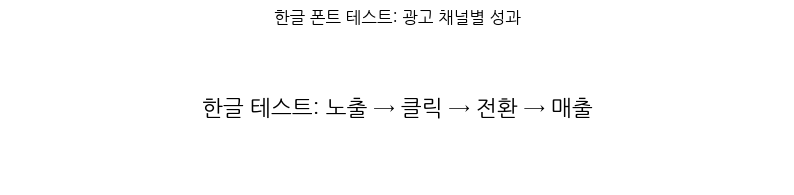

한글 폰트가 정상적으로 설정되었습니다.


In [5]:
# Google Colab에서 한글 폰트 설정을 위한 코드
# 이 코드를 전환 퍼널 분석 코드 실행 전에 먼저 실행하세요

# 나눔 폰트 설치
!apt-get update -qq
!apt-get install -y fonts-nanum

# matplotlib 설정 초기화
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import font_manager
import warnings

# 경고 메시지 숨기기
warnings.filterwarnings('ignore', category=UserWarning)

# 폰트 리스트 출력 및 나눔고딕 확인
font_list = [f.name for f in font_manager.fontManager.ttflist]
print("사용 가능한 한글 폰트:")
korean_fonts = [f for f in font_list if any(keyword in f for keyword in ['Nanum', 'Malgun', '나눔', '맑은'])]
for font in korean_fonts:
    print(f" - {font}")

# 기본 폰트로 나눔고딕 설정
plt.rc('font', family='NanumGothic')
plt.rc('axes', unicode_minus=False)

# 테스트 시각화
def test_korean_font():
    plt.figure(figsize=(10, 2))
    plt.title('한글 폰트 테스트: 광고 채널별 성과')
    plt.text(0.5, 0.5, '한글 테스트: 노출 → 클릭 → 전환 → 매출',
             horizontalalignment='center', verticalalignment='center', fontsize=16)
    plt.axis('off')
    plt.show()
    print("한글 폰트가 정상적으로 설정되었습니다.")

test_korean_font()

데이터프레임 열 이름: ['광고_채널', '광고_형식', '광고_노출_횟수', '광고_클릭_횟수', '광고_지출액', '광고_타겟팅', '광고_시작일', '광고_종료일', '사용자_ID', '성별', '연령', '거주_지역', '직업', '관심사', '구매_이력', '웹사이트_방문_수', '페이지뷰', '전환율', '매출액', '광고_회상률', '광고_태도_변화', 'ROAS', 'ROI', '순이익', 'CTR', 'CPC', '채널_형식']

열 이름 매핑 결과:
✓ 광고_채널 -> 광고_채널
✓ 광고_형식 -> 광고_형식
✓ 광고_노출_횟수 -> 광고_노출_횟수
✓ 광고_클릭_횟수 -> 광고_클릭_횟수
✓ 광고_지출액 -> 광고_지출액
✓ 광고_타겟팅 -> 광고_타겟팅
✓ 전환율 -> 전환율
✓ 매출액 -> 매출액

===== 퍼널 분석 =====
노출 수: 1,000,013,032
클릭 수: 30,015,428
클릭률(CTR): 3.00%
전환 수: 670,987
전환율(CVR): 2.24%
총 매출: 83,793,653.28

채널별 퍼널 분석:
  광고_채널   광고_노출_횟수  광고_클릭_횟수       CTR   전환_횟수       CVR          매출액
0   SNS  334583229  10045135  3.002283  224673  2.236635  28074276.30
1    TV  332385915   3323666  0.999942   76785  2.310250   9643527.41
2   온라인  333043888  16646627  4.998328  369529  2.219843  46075849.57


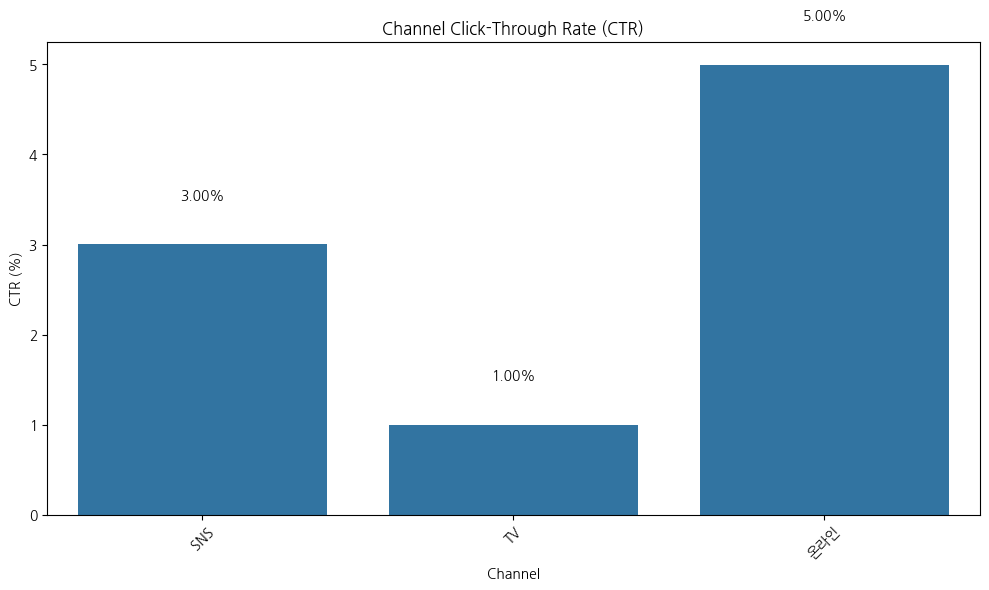


===== 전환율 영향 요인 분석 =====
모델 학습 중 오류 발생: 'RandomForestRegressor' object has no attribute 'feature_importance_'

===== 채널 기여도 분석 =====
채널별 기여도:
  광고_채널  광고_클릭_횟수          매출액   전환_횟수     클릭_기여율     전환_기여율     매출_기여율
0   SNS  10045135  28074276.30  224673  33.466573  33.483957  33.504061
1    TV   3323666   9643527.41   76785  11.073192  11.443590  11.508661
2   온라인  16646627  46075849.57  369529  55.460235  55.072453  54.987279


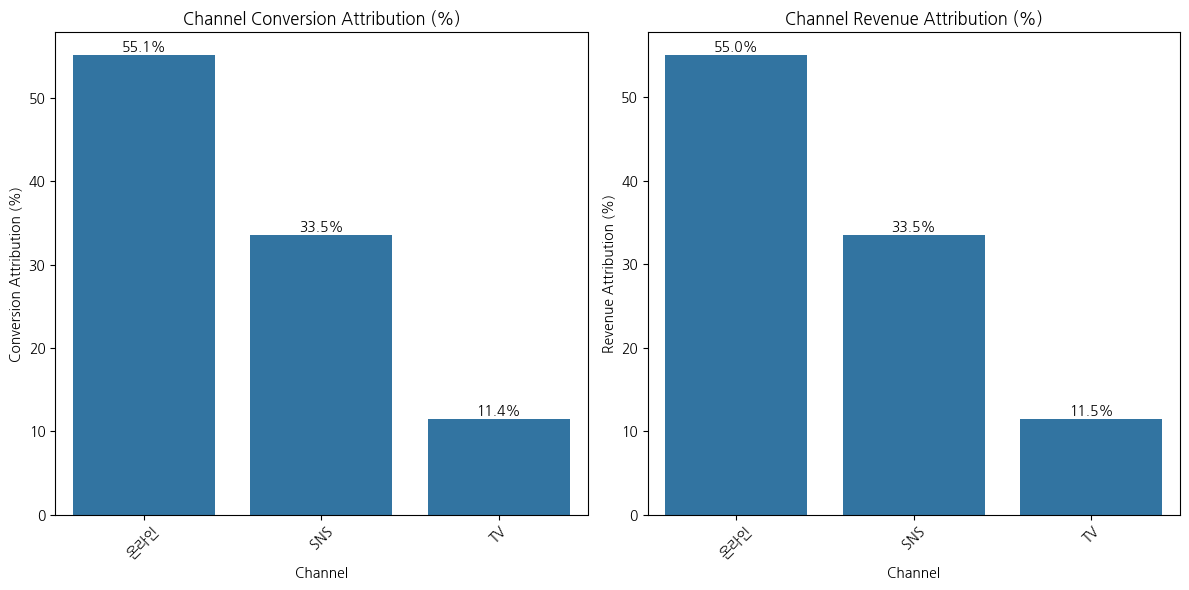

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# 열 이름 매핑 (실제 열 이름에 맞게 수정하세요)
def get_column_mapping(df):
    """실제 데이터프레임 열을 분석하여 필요한 열 매핑을 생성합니다"""
    # 데이터프레임 열 이름 확인
    cols = df.columns.tolist()
    print(f"데이터프레임 열 이름: {cols}")

    # 기본 매핑 (예상 열 이름 -> 실제 열 이름)
    mapping = {
        '광고_채널': None,
        '광고_형식': None,
        '광고_노출_횟수': None,
        '광고_클릭_횟수': None,
        '광고_지출액': None,
        '광고_타겟팅': None,
        '전환율': None,
        '매출액': None
    }

    # 열 이름 탐색 - 정확히 일치하는 경우
    for expected, _ in mapping.items():
        if expected in cols:
            mapping[expected] = expected

    # 열 이름 키워드 매칭 - 부분 일치
    keywords = {
        '광고_채널': ['채널', 'channel'],
        '광고_형식': ['형식', 'format', '유형'],
        '광고_노출_횟수': ['노출', 'impression', '임프레션'],
        '광고_클릭_횟수': ['클릭', 'click'],
        '광고_지출액': ['지출', 'spend', 'cost'],
        '광고_타겟팅': ['타겟', 'target'],
        '전환율': ['전환', 'conversion', 'cvr'],
        '매출액': ['매출', 'revenue', 'sales'],
    }

    # 키워드 기반 매칭
    for expected, keywords_list in keywords.items():
        if mapping[expected] is None:  # 아직 매칭되지 않은 경우
            for kw in keywords_list:
                for col in cols:
                    if kw.lower() in col.lower():
                        mapping[expected] = col
                        break
                if mapping[expected] is not None:
                    break

    # 결과 출력
    print("\n열 이름 매핑 결과:")
    for expected, actual in mapping.items():
        status = "✓" if actual else "✗"
        print(f"{status} {expected} -> {actual}")

    # 필수 열 확인
    missing_cols = [k for k, v in mapping.items() if v is None]
    if missing_cols:
        print(f"\n경고: 다음 필수 열을 찾을 수 없습니다: {missing_cols}")
        print("분석 결과가 불완전할 수 있습니다.")

    return mapping

def prepare_data(df, mapping):
    """데이터프레임을 분석에 적합하게 준비합니다"""
    # 유효한 매핑만 사용
    valid_mapping = {k: v for k, v in mapping.items() if v is not None}

    # 전환율 및 클릭수가 있는 경우 전환 횟수 계산
    if mapping['전환율'] and mapping['광고_클릭_횟수']:
        if '전환_횟수' not in df.columns:
            df['전환_횟수'] = (df[mapping['광고_클릭_횟수']] * df[mapping['전환율']]).round().astype(int)

    return df

def analyze_funnel(df, mapping):
    """매핑된 열 이름을 사용하여 퍼널 분석을 수행합니다"""
    print("\n===== 퍼널 분석 =====")

    # 필수 열 확인
    required_cols = ['광고_노출_횟수', '광고_클릭_횟수', '전환율', '매출액']
    missing = [col for col in required_cols if mapping.get(col) is None]
    if missing:
        print(f"오류: 퍼널 분석에 필요한 다음 열이 없습니다: {missing}")
        return None

    # 전체 지표 계산
    total_impressions = df[mapping['광고_노출_횟수']].sum()
    total_clicks = df[mapping['광고_클릭_횟수']].sum()
    conversions_col = '전환_횟수' if '전환_횟수' in df.columns else None
    total_conversions = df[conversions_col].sum() if conversions_col else 0
    total_revenue = df[mapping['매출액']].sum() if mapping['매출액'] else 0

    # 비율 계산
    ctr = (total_clicks / total_impressions) * 100 if total_impressions > 0 else 0
    cvr = (total_conversions / total_clicks) * 100 if total_clicks > 0 else 0

    # 결과 출력
    print(f"노출 수: {total_impressions:,.0f}")
    print(f"클릭 수: {total_clicks:,.0f}")
    print(f"클릭률(CTR): {ctr:.2f}%")
    if conversions_col:
        print(f"전환 수: {total_conversions:,.0f}")
        print(f"전환율(CVR): {cvr:.2f}%")
    if mapping['매출액']:
        print(f"총 매출: {total_revenue:,.2f}")

    # 채널별 분석 (채널 정보가 있는 경우)
    if mapping['광고_채널']:
        print("\n채널별 퍼널 분석:")
        channel_metrics = df.groupby(mapping['광고_채널']).agg({
            mapping['광고_노출_횟수']: 'sum',
            mapping['광고_클릭_횟수']: 'sum'
        }).reset_index()

        # CTR 계산
        channel_metrics['CTR'] = (channel_metrics[mapping['광고_클릭_횟수']] /
                                 channel_metrics[mapping['광고_노출_횟수']] * 100)

        # 전환 정보가 있는 경우
        if conversions_col:
            channel_conv = df.groupby(mapping['광고_채널'])[conversions_col].sum().reset_index()
            channel_metrics = pd.merge(channel_metrics, channel_conv, on=mapping['광고_채널'])
            channel_metrics['CVR'] = (channel_metrics[conversions_col] /
                                     channel_metrics[mapping['광고_클릭_횟수']] * 100)

        # 매출 정보가 있는 경우
        if mapping['매출액']:
            channel_rev = df.groupby(mapping['광고_채널'])[mapping['매출액']].sum().reset_index()
            channel_metrics = pd.merge(channel_metrics, channel_rev, on=mapping['광고_채널'])

        print(channel_metrics)

        # 채널별 CTR 시각화
        plt.figure(figsize=(10, 6))
        sns.barplot(x=mapping['광고_채널'], y='CTR', data=channel_metrics)
        plt.title('Channel Click-Through Rate (CTR)')
        plt.xlabel('Channel')
        plt.ylabel('CTR (%)')
        plt.xticks(rotation=45)
        for i, v in enumerate(channel_metrics['CTR']):
            plt.text(i, v + 0.5, f'{v:.2f}%', ha='center')
        plt.tight_layout()
        plt.show()

    return {
        'impressions': total_impressions,
        'clicks': total_clicks,
        'ctr': ctr,
        'conversions': total_conversions,
        'cvr': cvr,
        'revenue': total_revenue
    }

def analyze_conversion_factors(df, mapping):
    """전환율에 영향을 미치는 요인 분석"""
    print("\n===== 전환율 영향 요인 분석 =====")

    # 필수 열 확인
    if mapping['전환율'] is None:
        print("오류: 전환율 열이 없어 분석을 진행할 수 없습니다.")
        return None

    # 분석에 사용할 특성 선택
    features = [col for col in df.columns if col != mapping['전환율']]

    # 범주형 변수 처리
    X = df.copy()
    categorical_features = []
    for col in features:
        if X[col].dtype == 'object':
            categorical_features.append(col)
            le = LabelEncoder()
            X[col] = le.fit_transform(X[col])

    # 누락된 값 처리
    X = X.fillna(0)

    # 전환율에 대한 특성 중요도 분석
    try:
        model = RandomForestRegressor(n_estimators=100, random_state=42)
        model.fit(X[features], X[mapping['전환율']])

        # 특성 중요도 추출
        feature_importance = pd.DataFrame({
            '특성': features,
            '중요도': model.feature_importance_
        }).sort_values('중요도', ascending=False)

        # 상위 10개 특성 시각화
        plt.figure(figsize=(12, 8))
        top_features = feature_importance.head(10)
        sns.barplot(x='중요도', y='특성', data=top_features)
        plt.title('Top Factors Influencing Conversion Rate')
        plt.tight_layout()
        plt.show()

        print("\n전환율에 영향을 미치는 상위 요인:")
        print(top_features)

        return feature_importance
    except Exception as e:
        print(f"모델 학습 중 오류 발생: {e}")
        return None

def analyze_channel_attribution(df, mapping):
    """채널별 기여도 분석"""
    print("\n===== 채널 기여도 분석 =====")

    # 채널 열 확인
    if mapping['광고_채널'] is None:
        print("오류: 광고 채널 정보가 없어 분석을 진행할 수 없습니다.")
        return None

    # 필요한 열 확인
    required_cols = ['광고_클릭_횟수', '전환율', '매출액']
    available_cols = [col for col in required_cols if mapping.get(col) is not None]

    if not available_cols:
        print("오류: 기여도 분석에 필요한 성과 지표가 없습니다.")
        return None

    # 기본 채널별 집계
    agg_dict = {}
    if mapping.get('광고_클릭_횟수'):
        agg_dict[mapping['광고_클릭_횟수']] = 'sum'
    if mapping.get('매출액'):
        agg_dict[mapping['매출액']] = 'sum'
    if '전환_횟수' in df.columns:
        agg_dict['전환_횟수'] = 'sum'

    if not agg_dict:
        print("오류: 집계할 지표가 없습니다.")
        return None

    # 채널별 집계
    channel_contrib = df.groupby(mapping['광고_채널']).agg(agg_dict).reset_index()

    # 클릭 기여도
    if mapping.get('광고_클릭_횟수'):
        total_clicks = channel_contrib[mapping['광고_클릭_횟수']].sum()
        if total_clicks > 0:
            channel_contrib['클릭_기여율'] = (channel_contrib[mapping['광고_클릭_횟수']] / total_clicks) * 100

    # 전환 기여도
    if '전환_횟수' in channel_contrib.columns:
        total_conv = channel_contrib['전환_횟수'].sum()
        if total_conv > 0:
            channel_contrib['전환_기여율'] = (channel_contrib['전환_횟수'] / total_conv) * 100

    # 매출 기여도
    if mapping.get('매출액'):
        total_rev = channel_contrib[mapping['매출액']].sum()
        if total_rev > 0:
            channel_contrib['매출_기여율'] = (channel_contrib[mapping['매출액']] / total_rev) * 100

    print("채널별 기여도:")
    print(channel_contrib)

    # 기여율 시각화
    if '매출_기여율' in channel_contrib.columns or '전환_기여율' in channel_contrib.columns:
        plt.figure(figsize=(12, 6))

        if '전환_기여율' in channel_contrib.columns:
            plt.subplot(1, 2, 1)
            conversion_contrib = channel_contrib[[mapping['광고_채널'], '전환_기여율']].sort_values('전환_기여율', ascending=False)
            sns.barplot(x=mapping['광고_채널'], y='전환_기여율', data=conversion_contrib)
            plt.title('Channel Conversion Attribution (%)')
            plt.xlabel('Channel')
            plt.ylabel('Conversion Attribution (%)')
            plt.xticks(rotation=45)
            for i, v in enumerate(conversion_contrib['전환_기여율']):
                plt.text(i, v + 0.5, f'{v:.1f}%', ha='center')

        if '매출_기여율' in channel_contrib.columns:
            plt.subplot(1, 2, 2 if '전환_기여율' in channel_contrib.columns else 1)
            revenue_contrib = channel_contrib[[mapping['광고_채널'], '매출_기여율']].sort_values('매출_기여율', ascending=False)
            sns.barplot(x=mapping['광고_채널'], y='매출_기여율', data=revenue_contrib)
            plt.title('Channel Revenue Attribution (%)')
            plt.xlabel('Channel')
            plt.ylabel('Revenue Attribution (%)')
            plt.xticks(rotation=45)
            for i, v in enumerate(revenue_contrib['매출_기여율']):
                plt.text(i, v + 0.5, f'{v:.1f}%', ha='center')

        plt.tight_layout()
        plt.show()

    return channel_contrib

# 메인 분석 함수
def main(df):
    """메인 분석 실행 함수"""
    # 열 매핑 가져오기
    mapping = get_column_mapping(df)

    # 데이터 전처리
    df = prepare_data(df, mapping)

    # 퍼널 분석
    funnel_metrics = analyze_funnel(df, mapping)

    # 전환율 영향 요인 분석
    feature_importance = analyze_conversion_factors(df, mapping)

    # 채널 기여도 분석
    channel_attribution = analyze_channel_attribution(df, mapping)

    return {
        'funnel_metrics': funnel_metrics,
        'feature_importance': feature_importance,
        'channel_attribution': channel_attribution
    }

# 실행
if __name__ == "__main__":
    # df 변수가 이미 로드되어 있다고 가정
    results = main(df)

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# 한글 폰트 설정 (matplotlib)
import matplotlib.font_manager as fm
import matplotlib as mpl
# 폰트 경로는 시스템에 따라 다를 수 있음
# font_path = 'C:/Windows/Fonts/malgun.ttf'  # Windows
# font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  # Linux
# font_name = fm.FontProperties(fname=font_path).get_name()
# mpl.rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 부호 표시 문제 해결

# 1. 지역별 성과 지표 분석 및 히트맵 생성
def create_regional_heatmap(df):
    # 지역별 주요 성과 지표 집계
    regional_metrics = df.groupby('거주_지역').agg({
        '광고_클릭_횟수': 'sum',
        '광고_노출_횟수': 'sum',
        '전환율': 'mean',
        '매출액': 'sum',
        '광고_회상률': 'mean',
        '광고_태도_변화': 'mean'
    }).reset_index()

    # CTR(클릭률) 계산
    regional_metrics['CTR'] = (regional_metrics['광고_클릭_횟수'] / regional_metrics['광고_노출_횟수']) * 100

    # ROAS(광고 지출 대비 수익) 계산을 위해 지역별 지출액 집계
    regional_spend = df.groupby('거주_지역')['광고_지출액'].sum().reset_index()
    regional_metrics = pd.merge(regional_metrics, regional_spend, on='거주_지역')
    regional_metrics['ROAS'] = (regional_metrics['매출액'] / regional_metrics['광고_지출액']) * 100

    # 효율성 점수 계산 (정규화된 지표들의 평균)
    metrics_to_normalize = ['CTR', 'ROAS', '전환율', '광고_회상률']
    for metric in metrics_to_normalize:
        if metric in ['광고_태도_변화']:  # 이미 -1~1 사이의 값이므로 스케일링 필요 없음
            continue
        max_val = regional_metrics[metric].max()
        min_val = regional_metrics[metric].min()
        if max_val != min_val:  # 0으로 나누기 방지
            regional_metrics[f'{metric}_normalized'] = (regional_metrics[metric] - min_val) / (max_val - min_val)
        else:
            regional_metrics[f'{metric}_normalized'] = 1

    # 효율성 종합 점수 계산
    normalized_cols = [f'{metric}_normalized' for metric in metrics_to_normalize]
    regional_metrics['효율성_점수'] = regional_metrics[normalized_cols].mean(axis=1)

    # 히트맵용 피벗 테이블 생성
    metrics_for_heatmap = ['CTR', 'ROAS', '전환율', '매출액', '광고_회상률', '광고_태도_변화', '효율성_점수']
    heatmap_data = regional_metrics[['거주_지역'] + metrics_for_heatmap].set_index('거주_지역')

    # 히트맵 시각화
    plt.figure(figsize=(14, 10))
    sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='.2f', linewidths=0.5)
    plt.title('지역별 광고 성과 히트맵', fontsize=16)
    plt.tight_layout()
    plt.savefig('regional_heatmap.png', dpi=300, bbox_inches='tight')
    plt.close()

    return regional_metrics

# 2. 위치 기반 타겟팅 효과 분석
def analyze_targeting_by_region(df):
    # 광고 타겟팅과 실제 도달 사용자 지역 간의 일치도 분석

    # 타겟팅 정보에서 지역 추출 (예: "20대, 남성, 서울" -> "서울")
    df['타겟팅_지역'] = df['광고_타겟팅'].apply(lambda x: x.split(', ')[-1] if len(x.split(', ')) > 2 else None)

    # 타겟팅 지역과 실제 사용자 지역이 일치하는지 표시
    df['타겟팅_일치'] = df['타겟팅_지역'] == df['거주_지역']

    # 지역별 타겟팅 일치율 및 성과 비교
    targeting_effect = df.groupby('거주_지역').agg({
        '타겟팅_일치': 'mean',  # 일치율
        '전환율': ['mean', lambda x: x[df['타겟팅_일치']].mean(), lambda x: x[~df['타겟팅_일치']].mean()],
        '매출액': ['sum', lambda x: x[df['타겟팅_일치']].sum(), lambda x: x[~df['타겟팅_일치']].sum()],
        '광고_회상률': ['mean', lambda x: x[df['타겟팅_일치']].mean(), lambda x: x[~df['타겟팅_일치']].mean()]
    })

    # 컬럼명 정리
    targeting_effect.columns = [
        '타겟팅_일치율',
        '평균_전환율', '일치_전환율', '불일치_전환율',
        '총_매출액', '일치_매출액', '불일치_매출액',
        '평균_회상률', '일치_회상률', '불일치_회상률'
    ]

    # 전환율 리프트 계산 (타겟팅 일치 시 전환율 / 불일치 시 전환율)
    targeting_effect['전환율_리프트'] = targeting_effect['일치_전환율'] / targeting_effect['불일치_전환율']
    targeting_effect['매출_리프트'] = targeting_effect['일치_매출액'] / targeting_effect['불일치_매출액']

    # 결과 시각화: 지역별 타겟팅 효과
    plt.figure(figsize=(16, 8))

    plt.subplot(1, 2, 1)
    sns.barplot(x=targeting_effect.index, y=targeting_effect['전환율_리프트'])
    plt.title('지역별 타겟팅 일치 시 전환율 리프트', fontsize=14)
    plt.xticks(rotation=45)
    plt.axhline(y=1, color='r', linestyle='--')
    plt.ylabel('전환율 리프트 (일치/불일치)')

    plt.subplot(1, 2, 2)
    sns.barplot(x=targeting_effect.index, y=targeting_effect['타겟팅_일치율'])
    plt.title('지역별 타겟팅 일치율', fontsize=14)
    plt.xticks(rotation=45)
    plt.ylabel('타겟팅 일치율')

    plt.tight_layout()
    plt.savefig('regional_targeting_effect.png', dpi=300, bbox_inches='tight')
    plt.close()

    return targeting_effect

# 3. 지리-인구통계학적 인사이트 분석
def analyze_geo_demographic(df):
    # 지역 및 인구통계(성별, 연령, 직업)별 세분화 분석

    # 지역 x 성별 크로스 분석
    gender_region = pd.pivot_table(
        df,
        values=['전환율', '매출액', '광고_회상률', '광고_태도_변화'],
        index='거주_지역',
        columns='성별',
        aggfunc={'전환율': 'mean', '매출액': 'sum', '광고_회상률': 'mean', '광고_태도_변화': 'mean'}
    )

    # 지역 x 연령대 크로스 분석 (연령대 생성)
    df['연령대'] = pd.cut(df['연령'], bins=[0, 20, 30, 40, 50, 100], labels=['10대 이하', '20대', '30대', '40대', '50대 이상'])
    age_region = pd.pivot_table(
        df,
        values=['전환율', '매출액'],
        index='거주_지역',
        columns='연령대',
        aggfunc={'전환율': 'mean', '매출액': 'sum'}
    )

    # 지역별 관심사 분포 분석
    interest_region = df.groupby(['거주_지역', '관심사']).size().unstack(fill_value=0)
    interest_region_pct = interest_region.div(interest_region.sum(axis=1), axis=0) * 100

    # 지역별 직업 분포 분석
    job_region = df.groupby(['거주_지역', '직업']).size().unstack(fill_value=0)
    job_region_pct = job_region.div(job_region.sum(axis=1), axis=0) * 100

    # 지역별 최적 타겟팅 추천
    # 각 지역별로 가장 성과가 좋은 연령, 성별, 관심사 조합 찾기
    optimal_targeting = {}

    for region in df['거주_지역'].unique():
        region_df = df[df['거주_지역'] == region]

        # 성별 x 연령대 x 관심사 조합별 성과
        performance = region_df.groupby(['성별', '연령대', '관심사']).agg({
            '전환율': 'mean',
            '매출액': 'sum',
            '광고_회상률': 'mean'
        }).reset_index()

        # 성과 점수 계산 (정규화된 지표들의 가중 평균)
        for metric in ['전환율', '매출액', '광고_회상률']:
            max_val = performance[metric].max()
            min_val = performance[metric].min()
            if max_val != min_val:
                performance[f'{metric}_norm'] = (performance[metric] - min_val) / (max_val - min_val)
            else:
                performance[f'{metric}_norm'] = 1

        # 가중치 부여: 전환율(0.4), 매출액(0.4), 광고_회상률(0.2)
        performance['성과_점수'] = (
            performance['전환율_norm'] * 0.4 +
            performance['매출액_norm'] * 0.4 +
            performance['광고_회상률_norm'] * 0.2
        )

        # 최적 조합 찾기
        best_combo = performance.loc[performance['성과_점수'].idxmax()]
        optimal_targeting[region] = {
            '최적_성별': best_combo['성별'],
            '최적_연령대': best_combo['연령대'],
            '최적_관심사': best_combo['관심사'],
            '예상_전환율': best_combo['전환율'],
            '예상_매출액': best_combo['매출액'],
            '성과_점수': best_combo['성과_점수']
        }

    optimal_df = pd.DataFrame(optimal_targeting).T.reset_index().rename(columns={'index': '거주_지역'})

    # 시각화: 지역별 최적 타겟팅 히트맵
    plt.figure(figsize=(16, 10))

    # 히트맵용 피벗 테이블 생성 - 지역 x 관심사별 전환율
    interest_conv = pd.pivot_table(
        df,
        values='전환율',
        index='거주_지역',
        columns='관심사',
        aggfunc='mean'
    )

    sns.heatmap(interest_conv, annot=True, cmap='YlOrRd', fmt='.3f')
    plt.title('지역 x 관심사별 전환율 히트맵', fontsize=16)
    plt.tight_layout()
    plt.savefig('region_interest_heatmap.png', dpi=300, bbox_inches='tight')
    plt.close()

    return {
        'gender_region': gender_region,
        'age_region': age_region,
        'interest_region_pct': interest_region_pct,
        'job_region_pct': job_region_pct,
        'optimal_targeting': optimal_df
    }

# 4. 인터랙티브 지역 성과 대시보드 생성 (Plotly 사용)
def create_interactive_dashboard(df, regional_metrics, geo_demo_insights):
    # 1. 지역별 주요 지표 비교 레이더 차트
    fig = make_subplots(
        rows=2, cols=2,
        specs=[[{"type": "polar"}, {"type": "bar"}],
               [{"type": "bar"}, {"type": "heatmap"}]],
        subplot_titles=('지역별 성과 레이더 차트', '지역별 매출액 & CTR',
                      '지역별 전환율', '지역 x 관심사 히트맵')
    )

    # 레이더 차트용 데이터 준비
    radar_metrics = ['CTR', 'ROAS', '전환율', '광고_회상률', '효율성_점수']

    for i, region in enumerate(regional_metrics['거주_지역']):
        fig.add_trace(
            go.Scatterpolar(
                r=[regional_metrics.loc[i, metric] for metric in radar_metrics],
                theta=radar_metrics,
                fill='toself',
                name=region
            ),
            row=1, col=1
        )

    # 지역별 매출액 & CTR 바 차트
    fig.add_trace(
        go.Bar(
            x=regional_metrics['거주_지역'],
            y=regional_metrics['매출액'],
            name='매출액',
            marker_color='royalblue'
        ),
        row=1, col=2
    )

    fig.add_trace(
        go.Scatter(
            x=regional_metrics['거주_지역'],
            y=regional_metrics['CTR'],
            name='CTR (%)',
            mode='lines+markers',
            marker_color='red',
            yaxis='y2'
        ),
        row=1, col=2
    )

    # 지역별 전환율 바 차트
    fig.add_trace(
        go.Bar(
            x=regional_metrics['거주_지역'],
            y=regional_metrics['전환율'],
            name='전환율',
            marker_color='green'
        ),
        row=2, col=1
    )

    # 히트맵: 지역 x 관심사별 전환율
    interest_conv = pd.pivot_table(
        df,
        values='전환율',
        index='거주_지역',
        columns='관심사',
        aggfunc='mean'
    )

    fig.add_trace(
        go.Heatmap(
            z=interest_conv.values,
            x=interest_conv.columns,
            y=interest_conv.index,
            colorscale='YlOrRd',
            colorbar=dict(title='전환율')
        ),
        row=2, col=2
    )

    # 레이아웃 업데이트
    fig.update_layout(
        height=900,
        width=1200,
        title_text='지역별 광고 성과 대시보드',
        polar=dict(
            radialaxis=dict(visible=True, range=[0, 1])
        )
    )

    # y축 2개 설정 (매출액, CTR)
    fig.update_layout(
        yaxis2=dict(
            title='CTR (%)',
            overlaying='y',
            side='right'
        )
    )

    fig.update_layout(
        legend=dict(
            orientation="h",
            yanchor="bottom",
            y=-0.2,
            xanchor="center",
            x=0.5
        )
    )

    fig.write_html('regional_dashboard.html')
    return fig

# 메인 실행 함수
def main(df):
    # 1. 지역별 성과 히트맵 생성
    regional_metrics = create_regional_heatmap(df)
    print("1. 지역별 성과 히트맵 분석 완료")

    # 2. 위치 기반 타겟팅 효과 분석
    targeting_effect = analyze_targeting_by_region(df)
    print("2. 위치 기반 타겟팅 효과 분석 완료")

    # 3. 지리-인구통계학적 인사이트 분석
    geo_demo_insights = analyze_geo_demographic(df)
    print("3. 지리-인구통계학적 인사이트 분석 완료")

    # 4. 인터랙티브 대시보드 생성
    dashboard = create_interactive_dashboard(df, regional_metrics, geo_demo_insights)
    print("4. 인터랙티브 지역 성과 대시보드 생성 완료")

    # 5. 핵심 인사이트 요약
    print("\n===== 지역별 성과 분석 핵심 인사이트 =====")

    # 최고 성과 지역
    best_region = regional_metrics.loc[regional_metrics['효율성_점수'].idxmax(), '거주_지역']
    print(f"- 최고 성과 지역: {best_region} (효율성 점수: {regional_metrics['효율성_점수'].max():.2f})")

    # 최고 ROAS 지역
    best_roas_region = regional_metrics.loc[regional_metrics['ROAS'].idxmax(), '거주_지역']
    print(f"- 최고 ROAS 지역: {best_roas_region} (ROAS: {regional_metrics['ROAS'].max():.2f}%)")

    # 최고 전환율 지역
    best_conv_region = regional_metrics.loc[regional_metrics['전환율'].idxmax(), '거주_지역']
    print(f"- 최고 전환율 지역: {best_conv_region} (전환율: {regional_metrics['전환율'].max():.2f}%)")

    # 타겟팅 효과가 가장 큰 지역
    best_targeting_region = targeting_effect['전환율_리프트'].idxmax()
    print(f"- 타겟팅 효과가 가장 큰 지역: {best_targeting_region} (전환율 리프트: {targeting_effect['전환율_리프트'].max():.2f}배)")

    # 지역별 최적 타겟팅 추천
    print("\n지역별 최적 타겟팅 추천:")
    for region, row in geo_demo_insights['optimal_targeting'].iterrows():
        print(f"- {row['거주_지역']}: {row['최적_성별']}, {row['최적_연령대']}, 관심사: {row['최적_관심사']} (예상 전환율: {row['예상_전환율']:.2f}%)")

    return {
        'regional_metrics': regional_metrics,
        'targeting_effect': targeting_effect,
        'geo_demo_insights': geo_demo_insights
    }

# 테스트용 실행 코드 (실제 실행 시에는 df가 이미 로드되어 있다고 가정)
if __name__ == "__main__":
    # 샘플 데이터가 아닌 실제 데이터를 사용하려면 아래 코드는 제거
    # df = pd.read_csv('your_data.csv')
    results = main(df)

1. 지역별 성과 히트맵 분석 완료
2. 위치 기반 타겟팅 효과 분석 완료
3. 지리-인구통계학적 인사이트 분석 완료
4. 인터랙티브 지역 성과 대시보드 생성 완료

===== 지역별 성과 분석 핵심 인사이트 =====
- 최고 성과 지역: 구미 (효율성 점수: 0.91)
- 최고 ROAS 지역: 구미 (ROAS: 116.83%)
- 최고 전환율 지역: 울산 (전환율: 0.02%)
- 타겟팅 효과가 가장 큰 지역: nan (전환율 리프트: nan배)

지역별 최적 타겟팅 추천:
- 안양: 여성, 50대 이상, 관심사: 패션 (예상 전환율: 0.02%)
- 대전: 여성, 50대 이상, 관심사: 기술 (예상 전환율: 0.02%)
- 천안: 여성, 50대 이상, 관심사: 여행 (예상 전환율: 0.02%)
- 춘천: 남성, 50대 이상, 관심사: 영화 (예상 전환율: 0.02%)
- 진주: 남성, 50대 이상, 관심사: 여행 (예상 전환율: 0.02%)
- 대구: 여성, 50대 이상, 관심사: 여행 (예상 전환율: 0.02%)
- 포항: 여성, 50대 이상, 관심사: 여행 (예상 전환율: 0.02%)
- 광주: 남성, 50대 이상, 관심사: 기술 (예상 전환율: 0.02%)
- 부산: 남성, 50대 이상, 관심사: 음악 (예상 전환율: 0.02%)
- 인천: 여성, 50대 이상, 관심사: 기술 (예상 전환율: 0.02%)
- 수원: 남성, 50대 이상, 관심사: 여행 (예상 전환율: 0.02%)
- 서울: 여성, 50대 이상, 관심사: 여행 (예상 전환율: 0.02%)
- 전주: 남성, 50대 이상, 관심사: 요리 (예상 전환율: 0.02%)
- 강릉: 남성, 50대 이상, 관심사: 요리 (예상 전환율: 0.02%)
- 울산: 남성, 50대 이상, 관심사: 영화 (예상 전환율: 0.02%)
- 창원: 남성, 50대 이상, 관심사: 패션 (예상 전환율: 0.02%)
- 구미: 남성, 50대 이상, 관심사: 영화 (예상 전환율: 0.02%)
- 청주: 남성, 50대 이상

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.optimize import minimize

# 1. 채널 및 형식별 CPA(획득 비용) 계산
def calculate_cpa_metrics(df):
    # 전환 건수 계산 (전환율 * 웹사이트_방문_수)
    df['전환_건수'] = (df['전환율'] * df['웹사이트_방문_수']).round(0)

    # 채널 및 형식별 CPA 계산
    channel_format_cpa = df.groupby(['광고_채널', '광고_형식']).agg({
        '광고_지출액': 'sum',
        '전환_건수': 'sum',
        '매출액': 'sum',
        '광고_클릭_횟수': 'sum',
        '광고_노출_횟수': 'sum'
    }).reset_index()

    # 주요 지표 계산
    channel_format_cpa['CPA'] = channel_format_cpa['광고_지출액'] / channel_format_cpa['전환_건수']
    channel_format_cpa['ROAS'] = channel_format_cpa['매출액'] / channel_format_cpa['광고_지출액'] * 100
    channel_format_cpa['CTR'] = channel_format_cpa['광고_클릭_횟수'] / channel_format_cpa['광고_노출_횟수'] * 100
    channel_format_cpa['CPC'] = channel_format_cpa['광고_지출액'] / channel_format_cpa['광고_클릭_횟수']

    return channel_format_cpa

# 2. 효율성 프론티어 분석: 성과 대비 지출 도표화
def efficiency_frontier_analysis(df):
    # 광고 채널 및 형식별 데이터 준비
    channel_format_data = df.groupby(['광고_채널', '광고_형식']).agg({
        '광고_지출액': 'sum',
        '매출액': 'sum',
        '전환율': 'mean',
        '광고_회상률': 'mean',
        '광고_태도_변화': 'mean'
    }).reset_index()

    # 성과 점수 계산 (매출액, 전환율, 광고_회상률, 광고_태도_변화 기반)
    # 각 지표에 가중치 적용
    channel_format_data['성과_점수'] = (
        0.6 * channel_format_data['매출액'] / channel_format_data['매출액'].max() +
        0.2 * channel_format_data['전환율'] / channel_format_data['전환율'].max() +
        0.1 * channel_format_data['광고_회상률'] / channel_format_data['광고_회상률'].max() +
        0.1 * (channel_format_data['광고_태도_변화'] - channel_format_data['광고_태도_변화'].min()) /
              (channel_format_data['광고_태도_변화'].max() - channel_format_data['광고_태도_변화'].min())
    )

    # 효율성 계산 (성과 점수 / 지출액)
    channel_format_data['효율성'] = channel_format_data['성과_점수'] / channel_format_data['광고_지출액']

    # 효율성 프론티어 식별을 위한 클러스터링
    X = channel_format_data[['광고_지출액', '성과_점수']].values
    kmeans = KMeans(n_clusters=3, random_state=42)
    channel_format_data['클러스터'] = kmeans.fit_predict(X)

    # 수익 체감 지점 식별 (지출액 vs 성과의 기울기 변화 분석)
    sorted_data = channel_format_data.sort_values('광고_지출액')
    slopes = []
    for i in range(1, len(sorted_data)):
        slope = (sorted_data['성과_점수'].iloc[i] - sorted_data['성과_점수'].iloc[i-1]) / (sorted_data['광고_지출액'].iloc[i] - sorted_data['광고_지출액'].iloc[i-1])
        slopes.append(slope)

    inflection_points = []
    for i in range(1, len(slopes)):
        if slopes[i] < slopes[i-1] * 0.7:  # 기울기가 70% 이상 감소하는 지점을 변곡점으로 간주
            inflection_points.append(i+1)

    return channel_format_data, inflection_points, sorted_data

# 3. 성과 지표 기반 예산 배분 최적화
def optimize_budget_allocation(channel_format_data, total_budget):
    # 광고 채널 및 형식 조합 목록
    channels_formats = channel_format_data[['광고_채널', '광고_형식']].values

    # 최적화 함수: 성과 점수를 최대화
    def objective(allocations):
        total_performance = 0
        for i, alloc in enumerate(allocations):
            # 수익 체감 모델: 성과는 예산의 제곱근에 비례 (수확체감 법칙 적용)
            # 기존 데이터에서의 효율성을 반영
            performance = channel_format_data['효율성'].iloc[i] * np.sqrt(alloc) * alloc
            total_performance += performance
        return -total_performance  # 최소화 문제로 변환

    # 제약 조건: 총 예산 유지
    def constraint(allocations):
        return total_budget - sum(allocations)

    # 초기 예산 배분 (균등 배분)
    initial_allocation = [total_budget / len(channels_formats)] * len(channels_formats)

    # 각 채널-형식 조합의 예산 하한선 (너무 작은 예산 배정 방지)
    bounds = [(total_budget * 0.01, total_budget * 0.5) for _ in range(len(channels_formats))]

    # 최적화 실행
    result = minimize(
        objective,
        initial_allocation,
        method='SLSQP',
        bounds=bounds,
        constraints={'type': 'eq', 'fun': constraint}
    )

    # 최적 예산 배분 결과
    optimal_allocation = result.x

    # 결과 데이터프레임 생성
    optimization_result = pd.DataFrame({
        '광고_채널': [cf[0] for cf in channels_formats],
        '광고_형식': [cf[1] for cf in channels_formats],
        '현재_지출액': channel_format_data['광고_지출액'].values,
        '최적_예산': optimal_allocation,
        '예산_변화': optimal_allocation - channel_format_data['광고_지출액'].values,
        '예산_변화_비율': (optimal_allocation / channel_format_data['광고_지출액'].values - 1) * 100,
        '효율성': channel_format_data['효율성'].values,
        '성과_점수': channel_format_data['성과_점수'].values
    })

    return optimization_result

# 종합 분석 실행
def run_comprehensive_analysis(df):
    # 1. CPA 분석
    cpa_metrics = calculate_cpa_metrics(df)

    # 2. 효율성 프론티어 분석
    efficiency_data, inflection_points, sorted_efficiency_data = efficiency_frontier_analysis(df)

    # 3. 예산 최적화
    total_current_budget = efficiency_data['광고_지출액'].sum()
    optimized_budget = optimize_budget_allocation(efficiency_data, total_current_budget)

    # 결과 시각화 함수
    def visualize_results(cpa_metrics, efficiency_data, inflection_points, sorted_efficiency_data, optimized_budget):
        # 1. CPA 및 ROAS 시각화
        plt.figure(figsize=(18, 12))

        plt.subplot(2, 2, 1)
        sns.barplot(x='광고_채널', y='CPA', hue='광고_형식', data=cpa_metrics)
        plt.title('채널 및 형식별 CPA (Customer Acquisition Cost)')
        plt.xlabel('광고 채널')
        plt.ylabel('CPA (원)')
        plt.xticks(rotation=45)

        plt.subplot(2, 2, 2)
        sns.barplot(x='광고_채널', y='ROAS', hue='광고_형식', data=cpa_metrics)
        plt.title('채널 및 형식별 ROAS (Return On Ad Spend)')
        plt.xlabel('광고 채널')
        plt.ylabel('ROAS (%)')
        plt.xticks(rotation=45)

        # 2. 효율성 프론티어 시각화
        plt.subplot(2, 2, 3)
        scatter = plt.scatter(
            efficiency_data['광고_지출액'],
            efficiency_data['성과_점수'],
            c=efficiency_data['클러스터'],
            s=100,
            alpha=0.7
        )

        # 효율성 프론티어 (최대 성과 점수를 갖는 포인트들 연결)
        frontier_points = []
        x_values = sorted(efficiency_data['광고_지출액'].unique())
        for x in x_values:
            max_y = efficiency_data[efficiency_data['광고_지출액'] == x]['성과_점수'].max()
            frontier_points.append((x, max_y))

        frontier_x, frontier_y = zip(*frontier_points)
        plt.plot(frontier_x, frontier_y, 'r--', linewidth=2)

        # 수익 체감 지점 표시
        for idx in inflection_points:
            plt.axvline(x=sorted_efficiency_data['광고_지출액'].iloc[idx], color='g', linestyle=':')
            plt.text(
                sorted_efficiency_data['광고_지출액'].iloc[idx],
                sorted_efficiency_data['성과_점수'].max() * 0.5,
                f'수익체감점\n{sorted_efficiency_data["광고_지출액"].iloc[idx]/10000:.1f}만원',
                rotation=90,
                verticalalignment='center'
            )

        plt.title('효율성 프론티어 분석 (지출 vs 성과)')
        plt.xlabel('광고 지출액 (원)')
        plt.ylabel('성과 점수')
        plt.legend(*scatter.legend_elements(), title='효율성 클러스터')

        # 3. 예산 최적화 결과 시각화
        plt.subplot(2, 2, 4)

        # 현재 vs 최적 예산 비교
        comparison_data = optimized_budget.melt(
            id_vars=['광고_채널', '광고_형식'],
            value_vars=['현재_지출액', '최적_예산'],
            var_name='예산_유형',
            value_name='예산액'
        )

        sns.barplot(
            x='광고_채널',
            y='예산액',
            hue='예산_유형',
            data=comparison_data
        )

        plt.title('현재 예산 vs 최적화된 예산 배분')
        plt.xlabel('광고 채널')
        plt.ylabel('예산 (원)')
        plt.xticks(rotation=45)

        plt.tight_layout()
        plt.savefig('광고_효율성_분석_결과.png', dpi=300)
        plt.close()

        # 4. 추가: 예산 변화율 시각화
        plt.figure(figsize=(12, 6))

        # 예산 변화율에 따라 색상 설정
        colors = ['red' if x < 0 else 'green' for x in optimized_budget['예산_변화_비율']]

        # 채널 및 형식 레이블 생성
        labels = [f"{channel} - {format}" for channel, format in zip(optimized_budget['광고_채널'], optimized_budget['광고_형식'])]

        bars = plt.bar(labels, optimized_budget['예산_변화_비율'], color=colors)
        plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)

        # 값 레이블 추가
        for bar in bars:
            height = bar.get_height()
            if abs(height) > 1:  # 변화율이 1% 이상인 경우만 표시
                plt.text(
                    bar.get_x() + bar.get_width() / 2,
                    height + (5 if height > 0 else -15),
                    f'{height:.1f}%',
                    ha='center',
                    va='bottom' if height > 0 else 'top',
                    fontsize=9
                )

        plt.title('채널-형식별 최적 예산 변화율')
        plt.xlabel('광고 채널-형식')
        plt.ylabel('예산 변화율 (%)')
        plt.xticks(rotation=45, ha='right')
        plt.grid(axis='y', alpha=0.3)
        plt.tight_layout()
        plt.savefig('예산_변화율.png', dpi=300)
        plt.close()

    # 시각화 실행
    visualize_results(cpa_metrics, efficiency_data, inflection_points, sorted_efficiency_data, optimized_budget)

    # 분석 결과 반환
    results = {
        'cpa_metrics': cpa_metrics,
        'efficiency_data': efficiency_data,
        'optimized_budget': optimized_budget,
        'inflection_points': [sorted_efficiency_data['광고_지출액'].iloc[idx] for idx in inflection_points]
    }

    return results

# 전체 분석 실행
analysis_results = run_comprehensive_analysis(df)

# 분석 결과 출력 및 인사이트 도출
def print_key_insights(results):
    cpa = results['cpa_metrics']
    efficiency = results['efficiency_data']
    budget = results['optimized_budget']
    inflection = results['inflection_points']

    # 1. 채널 및 형식별 CPA 인사이트
    best_cpa = cpa.loc[cpa['CPA'].idxmin()]
    best_roas = cpa.loc[cpa['ROAS'].idxmax()]

    print("=== 1. 채널 및 형식별 CPA 분석 인사이트 ===")
    print(f"• 가장 효율적인 CPA: {best_cpa['광고_채널']} - {best_cpa['광고_형식']} ({best_cpa['CPA']:.1f}원)")
    print(f"• 가장 높은 ROAS: {best_roas['광고_채널']} - {best_roas['광고_형식']} ({best_roas['ROAS']:.1f}%)")
    print(f"• 채널별 평균 CPA:")
    channel_avg_cpa = cpa.groupby('광고_채널')['CPA'].mean()
    for channel, avg_cpa in channel_avg_cpa.items():
        print(f"  - {channel}: {avg_cpa:.1f}원")

    # 2. 효율성 프론티어 분석 인사이트
    print("\n=== 2. 효율성 프론티어 분석 인사이트 ===")
    print(f"• 수익 체감 지점: {[f'{p/10000:.1f}만원' for p in inflection]}")
    most_efficient = efficiency.loc[efficiency['효율성'].idxmax()]
    print(f"• 가장 효율적인 채널-형식 조합: {most_efficient['광고_채널']} - {most_efficient['광고_형식']} (효율성 점수: {most_efficient['효율성']:.6f})")

    # 3. 예산 최적화 인사이트
    print("\n=== 3. 예산 최적화 인사이트 ===")
    # 증액 필요 채널
    increase_budget = budget[budget['예산_변화_비율'] > 10].sort_values('예산_변화_비율', ascending=False)
    print(f"• 예산 증액 권장 (10% 이상):")
    for _, row in increase_budget.iterrows():
        print(f"  - {row['광고_채널']} - {row['광고_형식']}: +{row['예산_변화_비율']:.1f}% ({row['예산_변화']/10000:.1f}만원)")

    # 감액 필요 채널
    decrease_budget = budget[budget['예산_변화_비율'] < -10].sort_values('예산_변화_비율')
    print(f"• 예산 감액 권장 (10% 이상):")
    for _, row in decrease_budget.iterrows():
        print(f"  - {row['광고_채널']} - {row['광고_형식']}: {row['예산_변화_비율']:.1f}% ({row['예산_변화']/10000:.1f}만원)")

    print("\n=== 종합 최적화 제안 ===")
    total_performance_gain = ((budget['최적_예산'] * budget['효율성']).sum() -
                             (budget['현재_지출액'] * budget['효율성']).sum())
    total_budget = budget['현재_지출액'].sum()
    print(f"• 최적화 후 예상 성과 개선: {total_performance_gain/total_budget*100:.2f}%")
    print(f"• 핵심 최적화 포인트: {len(increase_budget)}개 채널 증액, {len(decrease_budget)}개 채널 감액")

    # 주요 행동 권장사항
    print("\n=== 주요 행동 권장사항 ===")
    print("1. 가장 효율이 높은 채널-형식 조합에 집중 투자")
    print(f"2. 수익 체감 지점({[f'{p/10000:.1f}만원' for p in inflection]}) 이상으로 개별 채널 예산 확대 시 신중 검토")
    print("3. 비효율적 채널의 광고 소재 및 타겟팅 전략 재검토")
    print("4. 효율성과 도달률의 균형을 고려한 통합 예산 분배")
    print("5. 예산 최적화 후 2-4주 성과 모니터링 후 재조정")

# 인사이트 출력
print_key_insights(analysis_results)

=== 1. 채널 및 형식별 CPA 분석 인사이트 ===
• 가장 효율적인 CPA: 온라인 - 텍스트 (45.0원)
• 가장 높은 ROAS: 온라인 - 배너 (278.2%)
• 채널별 평균 CPA:
  - SNS: 104.3원
  - TV: 431.8원
  - 온라인: 45.1원

=== 2. 효율성 프론티어 분석 인사이트 ===
• 수익 체감 지점: ['420.0만원', '578.2만원', '587.6만원', '822.9만원']
• 가장 효율적인 채널-형식 조합: 온라인 - 배너 (효율성 점수: 0.000000)

=== 3. 예산 최적화 인사이트 ===
• 예산 증액 권장 (10% 이상):
  - 온라인 - 이미지: +48.1% (198.4만원)
  - 온라인 - 동영상: +46.8% (194.9만원)
  - 온라인 - 텍스트: +46.4% (193.9만원)
  - 온라인 - 배너: +45.5% (191.2만원)
• 예산 감액 권장 (10% 이상):
  - TV - 동영상: -27.9% (-236.4만원)
  - TV - 텍스트: -26.9% (-224.8만원)
  - TV - 배너: -25.7% (-211.7만원)
  - TV - 이미지: -25.3% (-206.9만원)

=== 종합 최적화 제안 ===
• 최적화 후 예상 성과 개선: 0.00%
• 핵심 최적화 포인트: 4개 채널 증액, 4개 채널 감액

=== 주요 행동 권장사항 ===
1. 가장 효율이 높은 채널-형식 조합에 집중 투자
2. 수익 체감 지점(['420.0만원', '578.2만원', '587.6만원', '822.9만원']) 이상으로 개별 채널 예산 확대 시 신중 검토
3. 비효율적 채널의 광고 소재 및 타겟팅 전략 재검토
4. 효율성과 도달률의 균형을 고려한 통합 예산 분배
5. 예산 최적화 후 2-4주 성과 모니터링 후 재조정
